In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("./data/titanic_clean.csv")
data.head(5)

data["Pclass"] = data.Pclass.astype(int)
data["Age"] = data.Age.astype(int)

In [16]:
data["Age"].value_counts().sort_values(ascending=False)

29    197
24     31
22     27
30     27
28     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64

In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.303030,29.544332,0.523008,0.381594,32.204208,0.647587,1.536476,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.833418,13.013778,1.102743,0.806057,49.693429,0.477990,0.791503,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,2.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,1.000000,1.000000,1.000000


### EDA : 데이터 시각화로 탐색하기

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
eda = data.loc[:,'PassengerId': 'Embarked']
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [25]:
eda.corr()['PassengerId':"Fare"]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.025124,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.334241,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.025124,-0.334241,1.000000,-0.334923,0.082875,0.021693,-0.547980
Age,0.033741,-0.067809,-0.334923,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.082875,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.021693,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.547980,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

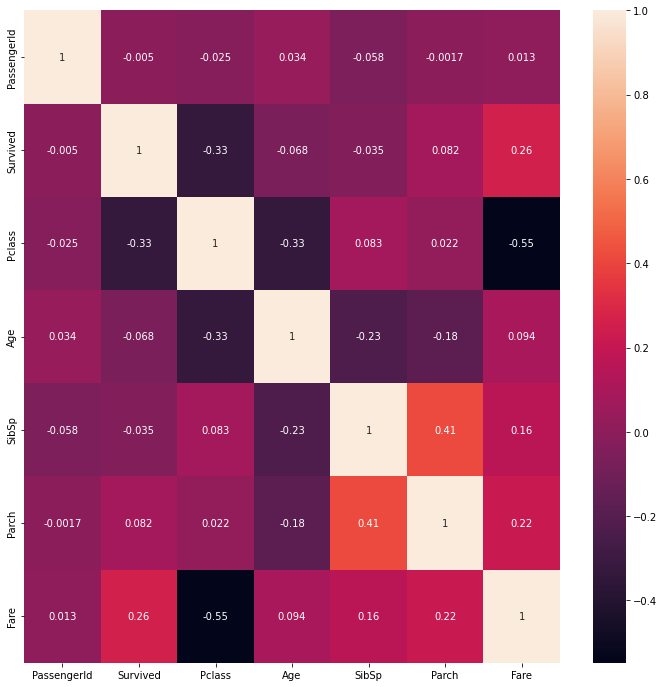

In [30]:
plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(eda.corr()['PassengerId':"Fare"], annot=True)

#### 특정 칼럼만 띄어서 보기

<AxesSubplot:>

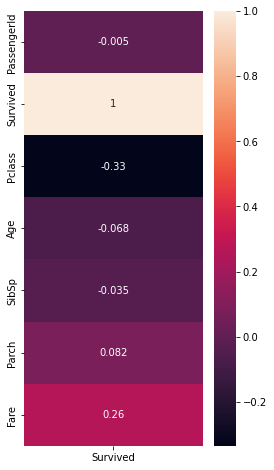

In [32]:
plt.figure(figsize = (4,8))
sns.heatmap(eda.corr()[["Survived"]], annot = True)

In [34]:
eda["Pclass"].value_counts().sort_index()

1    215
2    191
3    485
Name: Pclass, dtype: int64

#### 생존자(survived)와  각 칼럼간의 관계 살펴보기

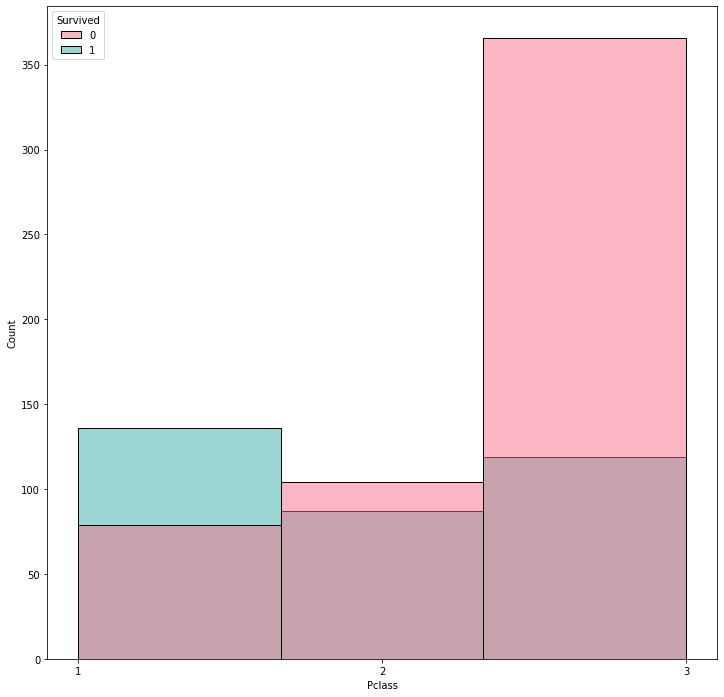

In [46]:
# 좌석 등급과 생존자관의 관계
sns.histplot(data = eda, x ="Pclass", hue ="Survived", bins = 3, palette="husl")
plt.xticks([1,2,3])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

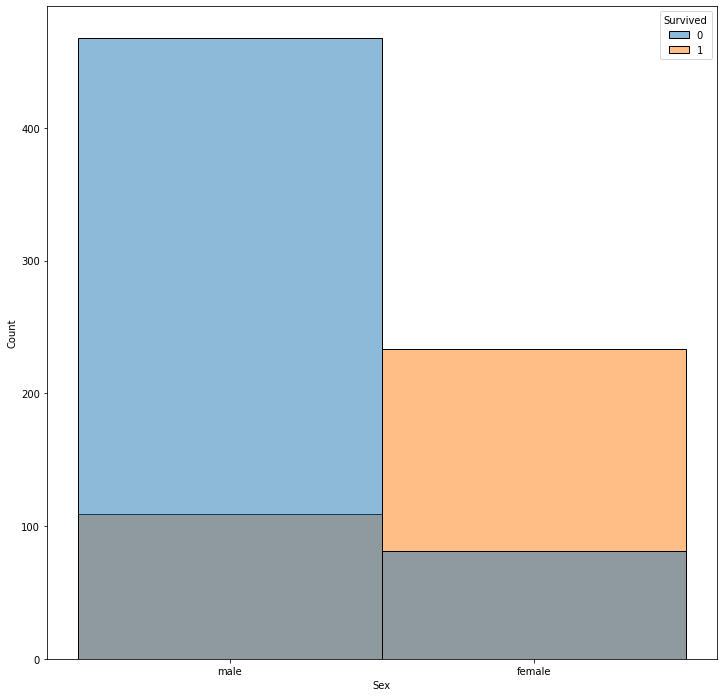

In [44]:
# 성별과 생존자관의 관계
sns.histplot(data = eda, x = "Sex", hue = "Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

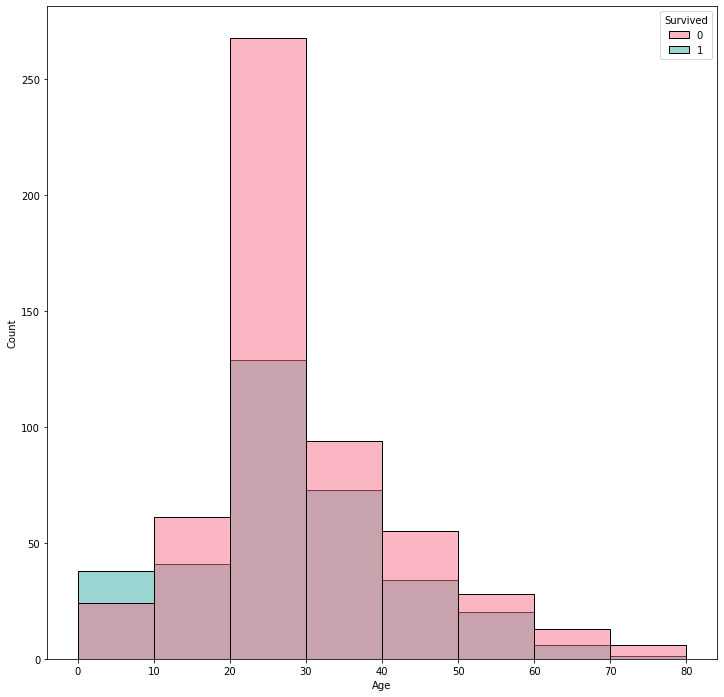

In [50]:
# 나이와 생존과의 관계를 histplot()
sns.histplot(data = eda, x = "Age", hue = "Survived", palette=  "husl", bins = 8)

In [52]:
# 탑승 항구에 따른 탑승자 수
eda["Embarked"].value_counts().sort_index()

C    168
Q     77
S    646
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

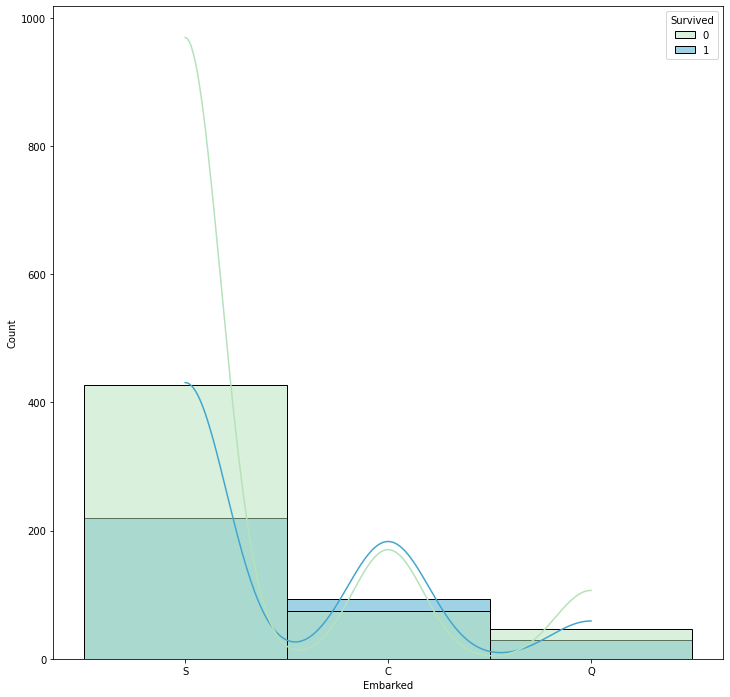

In [56]:
# 탑승자
sns.histplot(data = eda.sort_index() , x = "Embarked", hue = "Survived", bins = 8, palette="GnBu", kde = True)

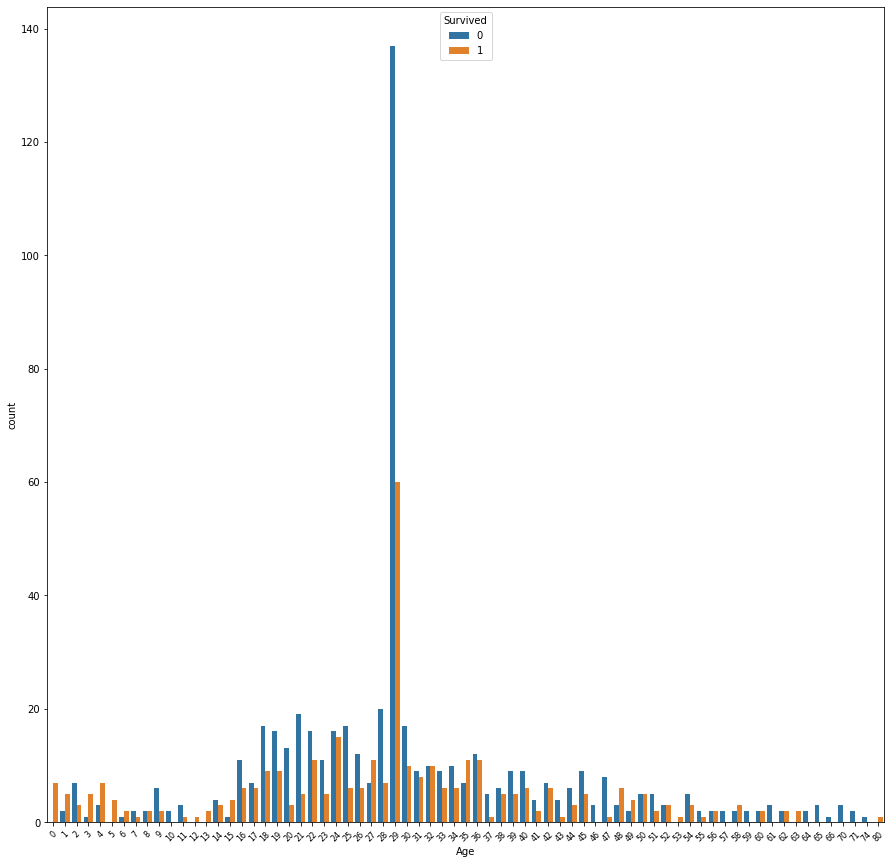

In [61]:
plt.figure(figsize = (15,15))
sns.countplot(data = eda, x = "Age", hue ="Survived")
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

##### Quiz
- Pclass 별로 생존자 수의 사망자 수를 막대그래프로 시각화


<AxesSubplot:xlabel='Survived', ylabel='count'>

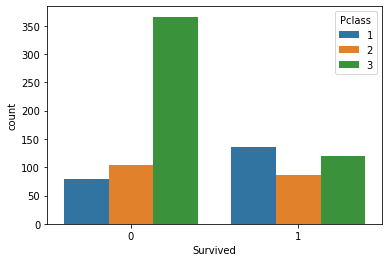

In [10]:
sns.countplot(data = eda,x = "Survived",  hue = "Pclass")

##### Quiz
- Embarked 탑승 항구별로 생존자 수 확인

<AxesSubplot:xlabel='Survived', ylabel='count'>

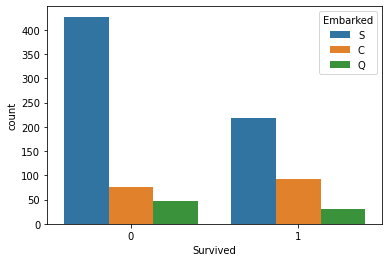

In [11]:
sns.countplot(data = eda, x = "Survived", hue = "Embarked")